In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:


#def fromatXvals(X):
#    formattedX = []
#    i = 0
#    for i in range(len(X)):
#        columns = [X[i][j*6:(j+1)*6] for j in range(7)]
#        formattedX.append( np.flipud(np.array(columns).T) )# transposing to get the expes

# Load dataset
data = pd.read_csv('Data/connect+4/connect-4.data', header=None)
#print (data)
# --- formatting X values --- 
# Map cell values
cellMap = {'x': 1, 'o': -1, 'b': 0}
X = data.iloc[:, :-1].map(lambda x: cellMap.get(x, x))
X = X.to_numpy() ## x is input values 
#formattedX = fromatXvals(X) ## getting x to look like a connect 4 boards for display only
print(X[0])
#print(formattedX)

# --- formating Y values ---
y = data.iloc[:, -1] # getting form 

def encodeLabel(label):
    labelMap = {
        'loss': -1.0,
        'draw': 0.0,
        'win': 1.0
    }
    return labelMap[label]


    
# Convert to  encoded labels
y  = np.array([encodeLabel(label) for label in y])
#print(y)# test

print(X.shape)  # Should be (number_of_samples, 6, 7)
print(y.shape)  # Should be (number_of_samples,)

[ 0  0  0  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0  1 -1  1 -1  1 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
(67557, 42)
(67557,)


In [8]:
unique, counts = np.unique(yTrain, return_counts=True)
print(dict(zip(unique, counts)))

NameError: name 'yTrain' is not defined

In [138]:
# resampling the data as wins are to large of a propoptions 
# Stack features and labels together
data = np.hstack((XTrain, yTrain.reshape(-1, 1)))

# Split by label
lossData  = data[yTrain == -1.0]
drawData  = data[yTrain ==  0.0]
winData   = data[yTrain ==  1.0]

# Downsample all to match loss_data (or smallest group, draw_data)
minLength = min(len(lossData), len(drawData)) # finding smalest data set 

winDataResised = resample(winData, replace=False, n_samples=minLength, random_state=42)
lossDataResised = resample(lossData, replace=False, n_samples=minLength, random_state=42)

# Combine and shuffle
balancedData = np.vstack([lossDataResised, drawData, winDataResised])
np.random.shuffle(balancedData)

XBalanced = balancedData[:, :-1]
yBalanced = balancedData[:, -1]


In [107]:
for i in range(0,len(XBalanced)):
    print(XBalanced[i])
    print(yBalanced[i])
    

[0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 2. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1.0
[1. 2. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 2. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
-1.0
[2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 2. 2. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0.]
1.0
[1. 2. 2. 1. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2. 2. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 2. 2. 1. 2. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0.]
-1.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 2. 0. 0. 0. 0. 2. 1. 2. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
-1.0
[2. 1. 0. 0. 0. 0. 1. 1. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 0. 

In [180]:
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))
    

{-1.0: 16635, 0.0: 6449, 1.0: 44473}


In [140]:
unique, counts = np.unique(yBalanced, return_counts=True)
print(dict(zip(unique, counts)))


{-1.0: 4095, 0.0: 4095, 1.0: 4095}


In [10]:
# spritting the data for train/ testing 

XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, 
    test_size=0.2,   
    random_state=42 ## locks random state for debugging nothing to do with board size
)

print(yTrain)
print(XTrain)

[ 1.  1.  1. ... -1.  1.  1.]
[[ 1 -1 -1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1 -1  0 ...  0  0  0]
 [-1 -1  0 ...  0  0  0]]


In [12]:
unique, counts = np.unique(yTrain, return_counts=True)
print(dict(zip(unique, counts)))

{-1.0: 13294, 0.0: 5154, 1.0: 35597}


In [14]:
# Balancing classes instead of above
classes = np.array([-1.0, 0.0, 1.0])
classWeights = compute_class_weight(class_weight='balanced', classes=classes, y=yTrain)
classWeightsDict = {class_: weight for class_, weight in zip([-1.0, 0.0, 1.0], classWeights)} # _ to stop class being key word 

print(classWeightsDict)

{-1.0: 1.3551226117045283, 0.0: 3.4953434225844005, 1.0: 0.5060819731999887}


In [16]:
## usings liner regression 
## creating models with varing amounts of neurons to see which is teh best speed accuracy trade off



def buildModel(n):
    model = Sequential()
    # Input layer
    model.add(Input(shape=(42,)))
    model.add(Dense(2**n, activation='relu'))
    
    # 1st Hidden layer 
    model.add(Dense(2**(n-1), activation='relu'))
    model.add(Dropout(0.3))  
    
    # 2nd Hidden layer 
    model.add(Dense(2**(n-2), activation='relu'))
    model.add(Dropout(0.3))  
    
    # Output layer 1 neurons for score of vals range of -1 to 1 
    model.add(Dense(1, activation='tanh'))
    
    
    model.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
    return model



 ## testing the data with differnt epoch values
results = pd.DataFrame(columns=['epochs', 'neurons', 'mae' , 'mse'])
n = 4
while n <= 9:
    epochVal = 10
    while epochVal <= 30:
        model = buildModel(n); # building the model so it dosent over train 
        model.fit(XTrain, yTrain, epochs=epochVal, batch_size=32, validation_split=0.2, class_weight=classWeightsDict)
        loss, mae, mse = model.evaluate(XTest, yTest)
        ## adding to data stucture 
        newResult = {'epochs': epochVal, 'neurons': 2**n, 'mae': mae ,'mse': mse }
        results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)
        epochVal+=5
    n+=1
# formating data 
formatedResultsMSE = results.pivot(index='epochs', columns='neurons', values='mse')
formatedResultsMAE = results.pivot(index='epochs', columns='neurons', values='mae')
#print(formatedResults)

Epoch 1/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6241 - mae: 0.8465 - mse: 0.8247 - val_loss: 0.5384 - val_mae: 0.6251 - val_mse: 0.5384
Epoch 2/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4690 - mae: 0.6481 - mse: 0.6035 - val_loss: 0.4865 - val_mae: 0.5620 - val_mse: 0.4865
Epoch 3/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4502 - mae: 0.6183 - mse: 0.5802 - val_loss: 0.5084 - val_mae: 0.5682 - val_mse: 0.5084
Epoch 4/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4418 - mae: 0.6016 - mse: 0.5713 - val_loss: 0.4682 - val_mae: 0.5269 - val_mse: 0.4682
Epoch 5/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4342 - mae: 0.5874 - mse: 0.5597 - val_loss: 0.4767 - val_mae: 0.5257 - val_mse: 0.4767
Epoch 6/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4268 - mae: 0.5726 - mse: 0.5473 - val_loss: 0.4593 - val_mae: 0.4960 - val_mse: 0.4593
Epoch 7/10
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.3991 - mae: 0.5314 - mse

C:\Users\FiercePC\AppData\Local\Temp\ipykernel_10292\775715685.py:40: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([newResult])], ignore_index=True)


1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.6341 - mae: 0.8450 - mse: 0.8202 - val_loss: 0.5493 - val_mae: 0.6061 - val_mse: 0.5493
Epoch 2/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4653 - mae: 0.6190 - mse: 0.5814 - val_loss: 0.5235 - val_mae: 0.5682 - val_mse: 0.5235
Epoch 3/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4510 - mae: 0.5938 - mse: 0.5593 - val_loss: 0.4747 - val_mae: 0.5240 - val_mse: 0.4747
Epoch 4/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4355 - mae: 0.5693 - mse: 0.5359 - val_loss: 0.4663 - val_mae: 0.5161 - val_mse: 0.4663
Epoch 5/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4308 - mae: 0.5628 - mse: 0.5287 - val_loss: 0.4565 - val_mae: 0.5019 - val_mse: 0.4565
Epoch 6/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4191 - mae: 0.5497 - mse: 0.5173 - val_loss: 0.4576 - val_mae: 0.5017 - val_mse: 0.4576
Epoch 7/15
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4158 - mae: 0.5445 - mse: 0.5134 - 

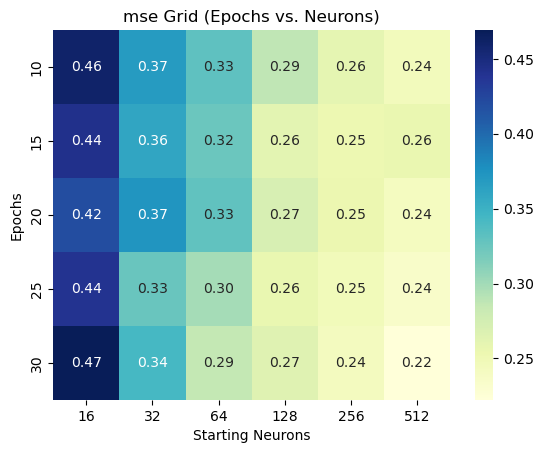

In [18]:
## heat map code for mse
sns.heatmap(formatedResultsMSE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mse Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

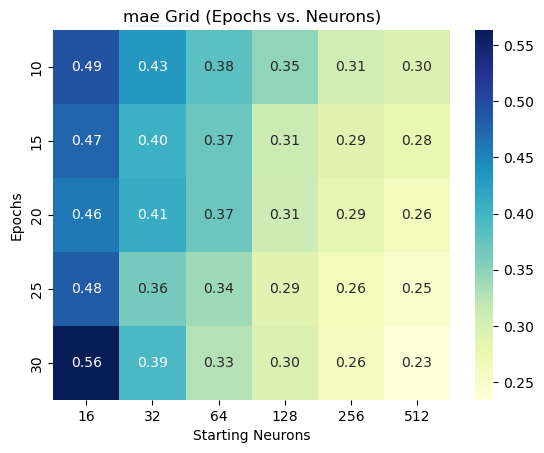

In [20]:
## heat map code for mae
sns.heatmap(formatedResultsMAE, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("mae Grid (Epochs vs. Neurons)")
plt.ylabel("Epochs")
plt.xlabel("Starting Neurons")
plt.show()

In [22]:
#formatedResults
best = results.loc[results['mse'].idxmin()]
print(f"Best config: epochs={best['epochs']}, neurons={best['neurons']}, mse={best['mse']}")

Best config: epochs=30, neurons=512, mse=0.22248154878616333


Epoch 1/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4458 - mae: 0.6092 - mse: 0.5551 - val_loss: 0.4427 - val_mae: 0.5012 - val_mse: 0.4427
Epoch 2/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3332 - mae: 0.4663 - mse: 0.4102 - val_loss: 0.3458 - val_mae: 0.4166 - val_mse: 0.3458
Epoch 3/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3038 - mae: 0.4255 - mse: 0.3631 - val_loss: 0.3660 - val_mae: 0.4328 - val_mse: 0.3660
Epoch 4/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2731 - mae: 0.3832 - mse: 0.3202 - val_loss: 0.3094 - val_mae: 0.3779 - val_mse: 0.3094
Epoch 5/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2531 - mae: 0.3578 - mse: 0.2952 - val_loss: 0.3109 - val_mae: 0.3681 - val_mse: 0.3109
Epoch 6/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2377 - mae: 0.3349 - mse: 0.2770 - val_loss: 0.2857 - val_mae: 0.3474 - val_mse: 0.2857
Epoch 7/30
1352/1352 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.2209 - mae: 0.3164 - mse

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_120 (Dense)                    │ (None, 512)                 │          22,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_121 (Dense)                    │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_122 (Dense)                    │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_123 (Dense)                    │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 559,109 (2.13 MB)

 Trainable params: 186,369 (728.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 372,740 (1.42 MB)

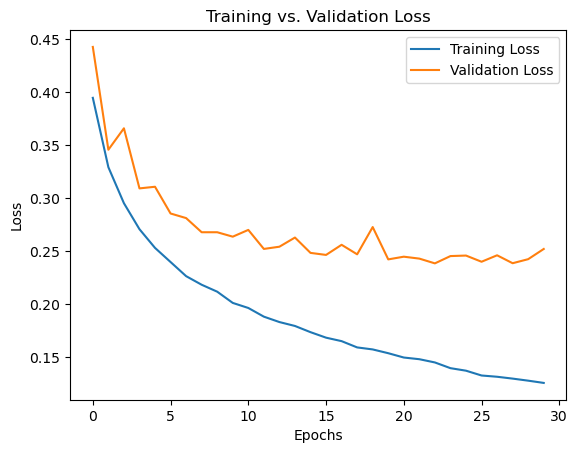

In [24]:
## the best model
bestModel = Sequential()

# Input layer 
bestModel.add(Input(shape=(42,)))
bestModel.add(Dense(best['neurons'], activation='relu'))

# 1st Hidden layer
bestModel.add(Dense(int(best['neurons']/2), activation='relu'))
bestModel.add(Dropout(0.5))  

# 2nd Hidden layer 
bestModel.add(Dense(int(best['neurons']/4), activation='relu'))
bestModel.add(Dropout(0.5))  

# Output layer 1 neurons for score of vals range of -1 to 1 
bestModel.add(Dense(1, activation='tanh'))


bestModel.compile(optimizer=Adam(), loss='mean_squared_error', metrics=['mae', 'mse'])
history = bestModel.fit(XTrain, yTrain, epochs=best['epochs'], batch_size=32, validation_split=0.2, class_weight=classWeightsDict)
bestModel.summary()

# Plotting Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
#testing 

loss, mae, mse = model.evaluate(XTest, yTest)
## adding to data stucture 
newResult = {'epochs': epochVal, 'neurons': best['neurons'], 'mae': mae ,'mse': mse }
print(newResult)

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2249 - mae: 0.2360 - mse: 0.2249  
{'epochs': 35, 'neurons': 512, 'mae': 0.23413977026939392, 'mse': 0.22248154878616333}


In [30]:
#tests for game agent
winBoard = [
    1, 1, 1, 1, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0,
    0, 0, 0, 0, 0, 0, 0
]

loseBoard = [
    -1, -1, -1, -1, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    0,  0,  0, 0, 0, 0, 0,
    -1,  -1,  -1, 0, 0, 0, 0
]

drawBoard = [ # wrong 
    1, 2, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1,
    1, -1, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1,
    1, -1, 1, -1, 1, -1, 1,
    -1, 1, -1, 1, -1, 1, -1
]

midgameBoard = [
    0,  0,  0,  0,  0,  0,  0,
    0,  0,  0,  0,  0,  0,  0,
    0,  0,  1, -1,  0,  0,  0,
    0,  1, -1,  1,  0,  0,  0,
    -1, -1,  1, -1,  0,  0,  0,
    1,  1, -1,  1,  0,  0,  0
]
boards = [winBoard, loseBoard, drawBoard, midgameBoard]
for i, board in enumerate(boards):
    pred = bestModel.predict(np.array([board]))[0][0]
    print(f"Board {i+1} prediction: {pred:.3f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Board 1 prediction: -1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Board 2 prediction: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Board 3 prediction: 1.000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Board 4 prediction: 1.000


In [32]:
preds = model.predict(XTest).flatten()
print(np.min(preds), np.max(preds), np.mean(preds))
#print(np.histogram(preds, bins=10))

for val in [-1.0, 0.0, 1.0]:
    groupPreds = preds[yTest == val]
    print(f"True {val}:")
    print(f"  Mean prediction = {np.mean(groupPreds):.3f}")
    print(f"  Std. deviation  = {np.std(groupPreds):.3f}")
    print(f"  Sample count    = {len(groupPreds)}")

423/423 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step
-1.0 1.0 0.36515108
True -1.0:
  Mean prediction = -0.683
  Std. deviation  = 0.468
  Sample count    = 3341
True 0.0:
  Mean prediction = 0.021
  Std. deviation  = 0.471
  Sample count    = 1295
True 1.0:
  Mean prediction = 0.810
  Std. deviation  = 0.387
  Sample count    = 8876


In [34]:
bestModel.save("Models/NeuaralNetworkLR_Connect4.h5")